In [43]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', None)
# Set random seed for reproducibility
random.seed(42)

# Constants
NUM_LOANS = 30000
START_DATE = datetime(2021, 1, 1)
END_DATE = datetime(2024, 1, 1)

# Helper functions
def random_date(start, end):
    """Generate a random datetime between `start` and `end`."""
    return start + timedelta(days=random.randint(0, int((end - start).days)))

def employment_status():
    return random.choice(['Employed', 'Unemployed', 'Self-Employed', 'Student'])

def income_range():
    return random.randrange(50000,1000000,10000)

def geographic_location():
    return random.choice(['Urban', 'Suburban', 'Rural'])

def collection_stage():
    return random.choice(['Internal Collections', 'External Collectors', 'Written Off'])

def loan_type():
    return random.choice(['New', 'Returning'])

def bucket_category(dpd):
    return '60+ Days in Arrears' if dpd >= 60 else 'Current'

def first_payment_default():
    return random.choice(['Yes', 'No'])

def num_loans():
    return random.randint(1,6)

def credit_score():
    return round(np.random.uniform(300, 850), 2)

def collections_status():
    return random.choice(['PTP', 'Unreachable', 'Disputed', 'Escalated'])

def restructured_loan():
    return random.choice([True, False])

def reasons_for_default():
    return random.choice(['DTI/DSR', 'Job Loss', 'Emergency', 'Death', 'Business Failure'])

# Generate sample data
random.seed(42)
data = {
    'Loan ID': [f'LN{i:05d}' for i in range(1, NUM_LOANS + 1)],
    'Disbursement Date': [random_date(START_DATE, END_DATE) for _ in range(NUM_LOANS)],
    'Principal Amount': np.random.uniform(1000, 200000, NUM_LOANS).round(2),
    'Interest Rate': np.random.uniform(5, 25, NUM_LOANS).round(2),
    'Loan Tenure (days/weeks/months)': np.random.randint(30, 720, NUM_LOANS),
    'Total Repaid': np.random.uniform(0, 200000, NUM_LOANS).round(2),
    'Outstanding Balance': np.random.uniform(500, 200000, NUM_LOANS).round(2),
    'Number of Missed Payments': np.random.randint(0, 12, NUM_LOANS),
    'Borrower Age': np.random.randint(18, 70, NUM_LOANS),
    'Employment Status': [employment_status() for _ in range(NUM_LOANS)],
    'Income Range': [income_range() for _ in range(NUM_LOANS)],
    'State/Location': [geographic_location() for _ in range(NUM_LOANS)],
    'Days Past Due (DPD)': np.random.randint(0, 365, NUM_LOANS),
    'Previous Collection Attempts': np.random.randint(0, 5, NUM_LOANS),
    'Current Collection Stage': [collection_stage() for _ in range(NUM_LOANS)],
    'Loan Type': [loan_type() for _ in range(NUM_LOANS)],
    'Bucket (60+ Days in Arrears)': [bucket_category(dpd) for dpd in np.random.randint(0, 365, NUM_LOANS)],
    'First Payment Default (FPD)': [first_payment_default() for _ in range(NUM_LOANS)],
    'Number of Loans': [num_loans() for _ in range(NUM_LOANS)],
    'Credit Score': [credit_score() for _ in range(NUM_LOANS)],
    'Collections Status': [collections_status() for _ in range(NUM_LOANS)],
    'Restructured Loan': [restructured_loan() for _ in range(NUM_LOANS)],
    'Reasons for Default': [reasons_for_default() for _ in range(NUM_LOANS)]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('loan_data.csv', index=False)

# Display sample data
df.head()

,Loan ID,Disbursement Date,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Employment Status,Income Range,State/Location,Days Past Due (DPD),Previous Collection Attempts,Current Collection Stage,Loan Type,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Collections Status,Restructured Loan,Reasons for Default
0,LN00001,2021-08-17,22681.41,16.11,159,39999.04,181060.46,8,61,Employed,750000,Rural,272,0,External Collectors,Returning,60+ Days in Arrears,No,3,779.24,Disputed,False,DTI/DSR
1,LN00002,2021-02-21,133593.95,8.21,715,110087.35,122719.26,5,21,Unemployed,100000,Suburban,140,3,External Collectors,New,60+ Days in Arrears,Yes,6,574.73,Disputed,False,Emergency
2,LN00003,2022-07-18,99901.44,11.62,446,32232.87,160523.96,9,46,Unemployed,900000,Rural,32,2,Internal Collections,Returning,Current,No,3,840.44,Unreachable,False,Business Failure
3,LN00004,2022-05-17,69982.25,8.20,460,186916.62,84381.64,4,50,Unemployed,360000,Rural,361,4,External Collectors,New,60+ Days in Arrears,Yes,2,634.56,PTP,False,DTI/DSR
4,LN00005,2022-04-03,162748.62,15.98,273,71145.71,133362.08,7,50,Student,240000,Suburban,228,1,Internal Collections,Returning,60+ Days in Arrears,Yes,1,459.30,Escalated,False,Emergency


In [44]:
# Check the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Loan ID                          30000 non-null  object        
 1   Disbursement Date                30000 non-null  datetime64[ns]
 2   Principal Amount                 30000 non-null  float64       
 3   Interest Rate                    30000 non-null  float64       
 4   Loan Tenure (days/weeks/months)  30000 non-null  int32         
 5   Total Repaid                     30000 non-null  float64       
 6   Outstanding Balance              30000 non-null  float64       
 7   Number of Missed Payments        30000 non-null  int32         
 8   Borrower Age                     30000 non-null  int32         
 9   Employment Status                30000 non-null  object        
 10  Income Range                     30000 non-null  int64    

**Observation**
* It is observed that there are no missing values

## Data Cleaning and Data Preprocessing

In [45]:
# Check first 5 rows
df.head()

,Loan ID,Disbursement Date,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Employment Status,Income Range,State/Location,Days Past Due (DPD),Previous Collection Attempts,Current Collection Stage,Loan Type,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Collections Status,Restructured Loan,Reasons for Default
0,LN00001,2021-08-17,22681.41,16.11,159,39999.04,181060.46,8,61,Employed,750000,Rural,272,0,External Collectors,Returning,60+ Days in Arrears,No,3,779.24,Disputed,False,DTI/DSR
1,LN00002,2021-02-21,133593.95,8.21,715,110087.35,122719.26,5,21,Unemployed,100000,Suburban,140,3,External Collectors,New,60+ Days in Arrears,Yes,6,574.73,Disputed,False,Emergency
2,LN00003,2022-07-18,99901.44,11.62,446,32232.87,160523.96,9,46,Unemployed,900000,Rural,32,2,Internal Collections,Returning,Current,No,3,840.44,Unreachable,False,Business Failure
3,LN00004,2022-05-17,69982.25,8.20,460,186916.62,84381.64,4,50,Unemployed,360000,Rural,361,4,External Collectors,New,60+ Days in Arrears,Yes,2,634.56,PTP,False,DTI/DSR
4,LN00005,2022-04-03,162748.62,15.98,273,71145.71,133362.08,7,50,Student,240000,Suburban,228,1,Internal Collections,Returning,60+ Days in Arrears,Yes,1,459.30,Escalated,False,Emergency


In [46]:
# Create Checkpoint
df_1 = df.copy()
# Drop LoanID and Disbursement Date
df_1.drop(['Loan ID', 'Disbursement Date'], axis=1, inplace=True)

Loan Id and disbursement date are dropped as they don't offer insights to the clustering to be used. 

In [47]:
# Get numerical data
num_data = df_1.select_dtypes(exclude=[object, bool]).columns

In [48]:
# Map Restructured Loan column, True:1, False:0
df_1['Restructured Loan'] = df_1['Restructured Loan'].map({True:1,False:0})

# Map First Payment Default, Yes:1, No:0
df_1['First Payment Default (FPD)'] = df_1['First Payment Default (FPD)'].map({'Yes':1,'No':0})

# Map Bucket, 60+:1, Current:0
df_1['Bucket (60+ Days in Arrears)'] = df_1['Bucket (60+ Days in Arrears)'].map(
    {'60+ Days in Arrears':1,
    'Current':0}
)

The categorical data that has just two classes are converted to 1 and 0

In [49]:
# Check first 5 rows after mapping
df_1.head()

,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Employment Status,Income Range,State/Location,Days Past Due (DPD),Previous Collection Attempts,Current Collection Stage,Loan Type,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Collections Status,Restructured Loan,Reasons for Default
0,22681.41,16.11,159,39999.04,181060.46,8,61,Employed,750000,Rural,272,0,External Collectors,Returning,1,0,3,779.24,Disputed,0,DTI/DSR
1,133593.95,8.21,715,110087.35,122719.26,5,21,Unemployed,100000,Suburban,140,3,External Collectors,New,1,1,6,574.73,Disputed,0,Emergency
2,99901.44,11.62,446,32232.87,160523.96,9,46,Unemployed,900000,Rural,32,2,Internal Collections,Returning,0,0,3,840.44,Unreachable,0,Business Failure
3,69982.25,8.20,460,186916.62,84381.64,4,50,Unemployed,360000,Rural,361,4,External Collectors,New,1,1,2,634.56,PTP,0,DTI/DSR
4,162748.62,15.98,273,71145.71,133362.08,7,50,Student,240000,Suburban,228,1,Internal Collections,Returning,1,1,1,459.30,Escalated,0,Emergency


In [50]:
# Get the summary of the categorical data
df_1.describe(include=object)

,Employment Status,State/Location,Current Collection Stage,Loan Type,Collections Status,Reasons for Default
count,30000,30000,30000,30000,30000,30000
unique,4,3,3,2,4,5
top,Student,Rural,Internal Collections,New,Disputed,Business Failure
freq,7629,10077,10122,15063,7542,6072


In [51]:
# Create checkpoint
df_2 = df_1.copy()

In [52]:
# Get dummy data
df_2 = pd.get_dummies(df_2, drop_first=True)

In [53]:
# Get first row of the data
df_2.head()

,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Income Range,Days Past Due (DPD),Previous Collection Attempts,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Restructured Loan,Employment Status_Self-Employed,Employment Status_Student,Employment Status_Unemployed,State/Location_Suburban,State/Location_Urban,Current Collection Stage_Internal Collections,Current Collection Stage_Written Off,Loan Type_Returning,Collections Status_Escalated,Collections Status_PTP,Collections Status_Unreachable,Reasons for Default_DTI/DSR,Reasons for Default_Death,Reasons for Default_Emergency,Reasons for Default_Job Loss
0,22681.41,16.11,159,39999.04,181060.46,8,61,750000,272,0,1,0,3,779.24,0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,133593.95,8.21,715,110087.35,122719.26,5,21,100000,140,3,1,1,6,574.73,0,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False
2,99901.44,11.62,446,32232.87,160523.96,9,46,900000,32,2,0,0,3,840.44,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False
3,69982.25,8.20,460,186916.62,84381.64,4,50,360000,361,4,1,1,2,634.56,0,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,162748.62,15.98,273,71145.71,133362.08,7,50,240000,228,1,1,1,1,459.30,0,False,True,False,True,False,True,False,True,True,False,False,False,False,True,False


The other categorical data has been OneHotEncoded.

In [54]:
# import Standardscaler
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler
scaler = StandardScaler()
# Transform the data
df_2[num_data] = scaler.fit_transform(df_2[num_data])

In [55]:
# Check the transformed data
df_2.head()

,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Income Range,Days Past Due (DPD),Previous Collection Attempts,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Restructured Loan,Employment Status_Self-Employed,Employment Status_Student,Employment Status_Unemployed,State/Location_Suburban,State/Location_Urban,Current Collection Stage_Internal Collections,Current Collection Stage_Written Off,Loan Type_Returning,Collections Status_Escalated,Collections Status_PTP,Collections Status_Unreachable,Reasons for Default_DTI/DSR,Reasons for Default_Death,Reasons for Default_Emergency,Reasons for Default_Job Loss
0,-1.354798,0.191813,-1.079334,-1.039359,1.402064,0.731920,1.174619,0.836275,0.853059,-1.407710,1,0,-0.292760,1.272645,0,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
1,0.577031,-1.172208,1.715781,0.167193,0.388637,-0.137321,-1.495789,-1.524983,-0.397024,0.709006,1,1,1.460996,-0.011337,0,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False
2,-0.009811,-0.583434,0.363468,-1.173052,1.045331,1.021667,0.173216,1.381181,-1.419818,0.003434,0,0,-0.292760,1.656879,0,False,False,True,False,False,True,False,True,False,False,True,False,False,False,False
3,-0.530932,-1.173934,0.433849,1.489790,-0.277314,-0.427068,0.440257,-0.580480,1.695917,1.414578,1,1,-0.877346,0.364296,0,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False
4,1.084835,0.169367,-0.506235,-0.503177,0.573510,0.442173,0.440257,-1.016404,0.436365,-0.702138,1,1,-1.461931,-0.736044,0,False,True,False,True,False,True,False,True,True,False,False,False,False,True,False


The numerical data has been standard encoded to remove the effect of scale.

## Create Clusters for the data

In [64]:
# Import kmeans from sklearn
from sklearn.cluster import KMeans
# Create the Kmeans clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10, max_iter=300)
# Insert the kmeans clusters into the original data
df['Kmeans_cluster'] = kmeans.fit_predict(df_2)

In [65]:
# import GaussianMixture
from sklearn.mixture import GaussianMixture
# Train GMM with 2 components (same as K-Means clusters)
gmm = GaussianMixture(n_components=2, random_state=42, max_iter=100)
# Insert the GaussianMixture clusters into the original data
df['GMM_Cluster'] = gmm.fit_predict(df_2)

In [66]:
# Check the new data
df.head()

,Loan ID,Disbursement Date,Principal Amount,Interest Rate,Loan Tenure (days/weeks/months),Total Repaid,Outstanding Balance,Number of Missed Payments,Borrower Age,Employment Status,Income Range,State/Location,Days Past Due (DPD),Previous Collection Attempts,Current Collection Stage,Loan Type,Bucket (60+ Days in Arrears),First Payment Default (FPD),Number of Loans,Credit Score,Collections Status,Restructured Loan,Reasons for Default,Kmeans_cluster,GMM_Cluster,Comparison
0,LN00001,2021-08-17,22681.41,16.11,159,39999.04,181060.46,8,61,Employed,750000,Rural,272,0,External Collectors,Returning,60+ Days in Arrears,No,3,779.24,Disputed,False,DTI/DSR,1,1,Same
1,LN00002,2021-02-21,133593.95,8.21,715,110087.35,122719.26,5,21,Unemployed,100000,Suburban,140,3,External Collectors,New,60+ Days in Arrears,Yes,6,574.73,Disputed,False,Emergency,0,0,Same
2,LN00003,2022-07-18,99901.44,11.62,446,32232.87,160523.96,9,46,Unemployed,900000,Rural,32,2,Internal Collections,Returning,Current,No,3,840.44,Unreachable,False,Business Failure,1,1,Same
3,LN00004,2022-05-17,69982.25,8.20,460,186916.62,84381.64,4,50,Unemployed,360000,Rural,361,4,External Collectors,New,60+ Days in Arrears,Yes,2,634.56,PTP,False,DTI/DSR,1,0,Same
4,LN00005,2022-04-03,162748.62,15.98,273,71145.71,133362.08,7,50,Student,240000,Suburban,228,1,Internal Collections,Returning,60+ Days in Arrears,Yes,1,459.30,Escalated,False,Emergency,1,1,Same


In [67]:
# Compare the clusters made the different algorithms
df['Comparison'] = np.where(df['Kmeans_cluster'] == df['GMM_Cluster'], "Same", "Different")
df['Comparison'].value_counts(normalize=True)

Comparison
Different    0.504
Same         0.496
Name: proportion, dtype: float64

**Observation**
* Kmeans and GussianMixture clustered the data differently, meaning 0 and 1 will represent different clusters for both.

In [60]:
df.groupby("GMM_Cluster")[["Days Past Due (DPD)", "Number of Missed Payments", "Credit Score",'Total Repaid',"Outstanding Balance", "Loan Tenure (days/weeks/months)"]].mean()

,Days Past Due (DPD),Number of Missed Payments,Credit Score,Total Repaid,Outstanding Balance,Loan Tenure (days/weeks/months)
GMM_Cluster,,,,,,
0,181.437811,5.460132,577.312144,151300.020329,100564.430003,374.248353
1,182.399974,5.487505,575.772136,50298.659634,100131.436087,373.159791


In [61]:
df.groupby("Kmeans_cluster")[["Days Past Due (DPD)", "Number of Missed Payments", "Credit Score",'Total Repaid',"Outstanding Balance", "Loan Tenure (days/weeks/months)"]].mean()

,Days Past Due (DPD),Number of Missed Payments,Credit Score,Total Repaid,Outstanding Balance,Loan Tenure (days/weeks/months)
Kmeans_cluster,,,,,,
0,181.056549,5.436315,577.655357,151099.487552,100599.138736,374.197454
1,182.780697,5.511177,575.427128,50155.500914,100095.607859,373.206501


**Observation**
* Gussian Mixture
    * It is seen that the average for Days past due, number of missed payments, credit score, outstanding balance, and Loan Tenure is approximately the same for both clusters this means the Gaussian mixture is not recognizing the behavior among lenders to fully cluster them.
    * Total repaid is higher in cluster 0 which may be specifying that cluster 0 has higher recovery but clustering based on just one feature is not sufficient
* KMeans
    * It is seen that the average for Days past due, number of missed payments, credit score, outstanding balance, and Loan Tenure is approximately the same for both clusters this means the KMeans is not recognizing the behavior among lenders to fully cluster them.
    * Total repaid is higher in cluster 0 which may be specifying that cluster 0 has higher recovery but clustering based on just one feature is not sufficient.

<Axes: >

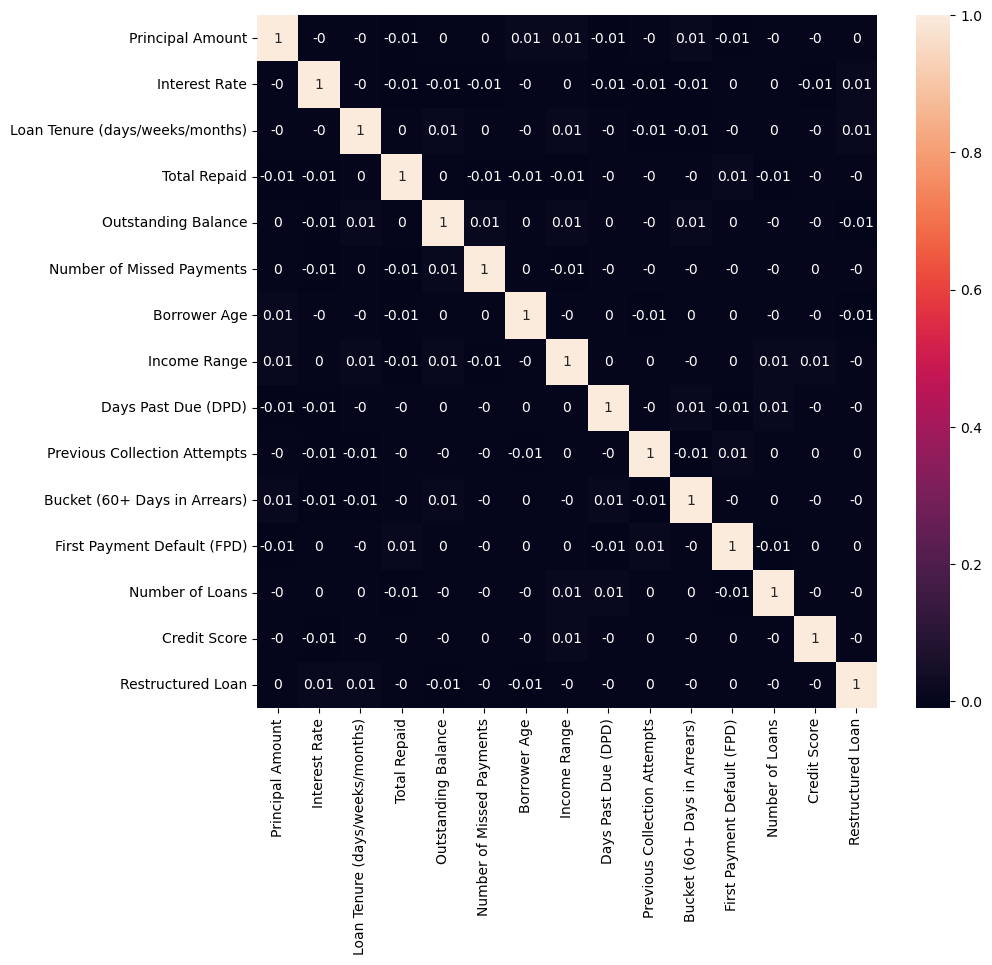

In [62]:
# import seaborn
import seaborn as sns
plt.figure(figsize=(10,9))
sns.heatmap(np.round(df_1.select_dtypes(include=[int,float]).corr(),2), annot=True)

**Note**
* It can be seen there is no relationship between the features.